<h1>CROSS VALIDATION</H1>

<h2>se configura el mejor modelo del caso 1 el cual es el modelo de regresion ponderada  </h2>

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [144]:
#Importar base de datos
df = pd.read_csv('nike_shoes_sales.csv')

In [145]:
total_faltantes_por_columna = df.isnull().sum()
total_faltantes_por_columna

product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64

In [146]:
df.drop(['discount', 'images'], axis=1, inplace=True)

In [147]:
df['description'].fillna('', inplace=True)

In [148]:
#categorizacion del rating

def categorize_rating(rating):
    if rating < 2:
        return 1
    elif rating < 4:
        return 2
    else:
        return 3

df['category'] = df['rating'].apply(categorize_rating)

print(df)

                             product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price brand                                        description  \
0          7495  Nike  Let your shoe game shimmer in the Ni

In [170]:
#eliminar atipicos de reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# cuartiles
Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_atip_reviews = df[(df['reviews'] > lower_bound) & (df['reviews'] < upper_bound)]

In [172]:
valores_unicos = df_atip_reviews['reviews'].unique()


In [183]:
df_media = df_atip_reviews.copy()
df_media['listing_price'].replace(0, pd.NA, inplace=True)

# Calcular la media de la columna "listing_price" excluyendo los valores NaN
media_listing_price = df_atip_reviews['listing_price'].mean()

# Imputar los valores faltantes en la columna "listing_price" con la media calculada
df_media['listing_price'].fillna(media_listing_price, inplace=True)

# Imprimir las primeras filas del DataFrame con valores imputados
print(df_media.head())

print(media_listing_price)

                     product_name  product_id  listing_price  sale_price  \
0  Nike Air Force 1 '07 Essential  CJ1646-600    3785.427273        7495   
1            Nike Air Force 1 '07  CT4328-101    3785.427273        7495   
2    Nike Air Force 1 Sage Low LX  CI3482-200    3785.427273        9995   
3             Nike Air Max Dia SE  CD0479-200    3785.427273        9995   
4             Nike Air Max Verona  CZ6156-101    3785.427273        9995   

  brand                                        description  rating  reviews  \
0  Nike  Let your shoe game shimmer in the Nike Air For...     0.0        0   
1  Nike  The legend lives on in the Nike Air Force 1 '0...     0.0        0   
2  Nike  Taking both height and craft to new levels, th...     0.0        0   
3  Nike  Designed for a woman's foot, the Nike Air Max ...     0.0        0   
4  Nike  Pass on the good vibes in the Nike Air Max Ver...     0.0        0   

   category  
0         1  
1         1  
2         1  
3         1 

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la varianza de 'listing_price'
var_listing_price = df_media['listing_price'].var()

# Calcular la media de la varianza
media_varianza = var_listing_price.mean()


In [185]:
# Definir un umbral como, por ejemplo, 3 veces la desviación estándar
umbral = 6 * df_media['listing_price'].std()

# Filtrar los datos para eliminar los valores que están muy lejos de la varianza media
df_filtrado = df_media[abs(df_imputacion['listing_price'] - media_varianza) <= umbral]


In [186]:
print(df_filtrado.head())

Empty DataFrame
Columns: [product_name, product_id, listing_price, sale_price, brand, description, rating, reviews, category]
Index: []


/var/folders/yw/nb4gq0ps4dz27qdw36vgkbp80000gn/T/ipykernel_22594/523286708.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_filtrado[(df_nuevo['sale_price'] > lower_bound) & (df_imputacion['sale_price'] < upper_bound)]


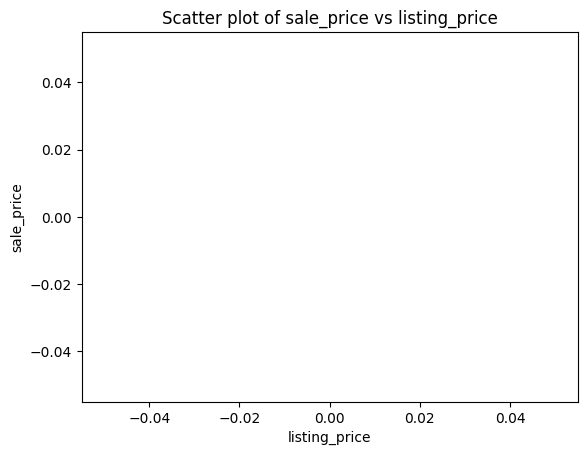

TypeError: expected non-empty vector for x

In [182]:

# Calculate the quartiles and the IQR
Q1 = df_filtrado['sale_price'].quantile(0.25)
Q3 = df_filtrado['sale_price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

# Identify and remove outliers
df_no_outliers = df_filtrado[(df_nuevo['sale_price'] > lower_bound) & (df_imputacion['sale_price'] < upper_bound)]

# Create a scatter plot
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price'])
plt.xlabel('listing_price')
plt.ylabel('sale_price')
plt.title('Scatter plot of sale_price vs listing_price')
plt.show()

# Perform the linear regression
slope, intercept = np.polyfit(df_no_outliers['listing_price'], df_no_outliers['sale_price'], 1)

# Create a line of best fit
x_values = np.linspace(df_no_outliers['listing_price'].min(), df_no_outliers['listing_price'].max(), 100)
y_values = slope * x_values + intercept

# Plot the line of best fit
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price'])
plt.plot(x_values, y_values, color='red')
plt.xlabel('listing_price')
plt.ylabel('sale_price')
plt.title('Scatter plot of sale_price vs listing_price with line of best fit')
plt.show()

In [155]:
df_no_outliers = pd.DataFrame(df_no_outliers)

# Añadir una columna de unos para el término de intercepción
df_no_outliers['intercept'] = 1

# Definir las variables independiente (X) y dependiente (y)
X = df_no_outliers[['intercept', 'listing_price']]
y = df_no_outliers['sale_price']
print(X.head())
# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

    intercept  listing_price
21          1           7995
33          1          15995
56          1          15995
69          1          13995
87          1          10995
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1796.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           6.80e-96
Time:                        21:18:35   Log-Likelihood:                -1505.4
No. Observations:                 183   AIC:                             3015.
Df Residuals:                     181   BIC:                             3021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err 

<h2>inicía la aplicación de Cross Validation con el modelo  de regresion ponderada</h2>

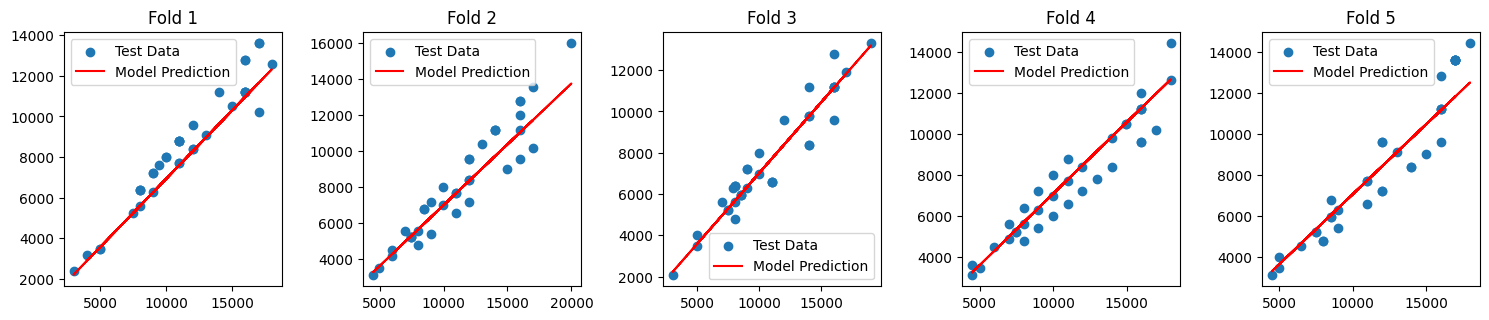

MSE promedio para K-Fold CV: 911433.5941004204
[913145.1473968041, 1108041.7761523742, 595421.8520418247, 715265.4617901426, 1225293.7331209565]


In [156]:

# Método 1: K-Fold Cross-Validation

k =5# Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo de regresion ponderada en el conjunto de entrenamiento simulado
    modelo_fold = sm.WLS(y_train, X_train, weights=1/y_train**2)
    #Aquí se está ajustando un modelo ponderado utilizando los datos de entrenamiento 
    # X_train e y_train del pliegue actual. Los pesos se definen como el inverso del cuadrado de los valores de y_train
    resultados_fold = modelo_fold.fit()

    # Evaluar el modelo en el conjunto de prueba
    y_pred = resultados_fold.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(X_test['listing_price'], y_test, label='Test Data')
    plt.plot(X_test['listing_price'], y_pred, label='Model Prediction', color='red')
    plt.title(f'Fold {fold}')
    plt.legend()
    fold += 1

# Calcular el MSE promedio para los pliegues
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados de la validación cruzada
plt.show()

# Mostrar el MSE promedio para los pliegues
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print(mse_scores)
